<a href="https://colab.research.google.com/github/GuraTom9/NLP100/blob/main/NLP100_60_69.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#第7章　単語ベクトル

##60. 単語ベクトルの読み込みと表示

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd "drive/My Drive/NLP100"

/content/drive/My Drive/NLP100


In [ ]:
! gunzip GoogleNews-vectors-negative300.bin.gz

In [ ]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

print(model["United_States"].shape)
print(model["United_States"])

(300,)
[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -

##61. 単語の類似度

In [ ]:
# 2つの単語の類似度を算出する
model.similarity("United_States", "U.S.")

0.73107743

##62. 類似度の高い単語10件

In [ ]:
# 単語の類似度の高いものを上から１０個表示する
model.most_similar("United_States", topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370987892151),
 ('United_Sates', 0.7400724291801453),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]

##63. 加法構成性によるアナロジー

In [ ]:
# ベクトルを足し引きして、類似度の高いものを上から１０個表示する
calculated_vector = model["Spain"] - model["Madrid"] + model["Athens"]
model.similar_by_vector(calculated_vector, topn=10)

[('Athens', 0.7528455853462219),
 ('Greece', 0.6685472130775452),
 ('Aristeidis_Grigoriadis', 0.5495778322219849),
 ('Ioannis_Drymonakos', 0.5361457467079163),
 ('Greeks', 0.5351786017417908),
 ('Ioannis_Christou', 0.5330225825309753),
 ('Hrysopiyi_Devetzi', 0.5088489055633545),
 ('Iraklion', 0.5059264302253723),
 ('Greek', 0.5040615797042847),
 ('Athens_Greece', 0.5034108757972717)]

In [ ]:
# 単語の意味を足し引きして、類似度の高いものを上から１０個表示する
model.most_similar(positive=["Spain", "Athens"], negative=["Madrid"], topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862097740173),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]

##64. アナロジーデータでの実験

In [ ]:
! wget http://download.tensorflow.org/data/questions-words.txt

--2023-03-29 08:01:50--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.214.128, 2607:f8b0:400c:c0b::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.214.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.02s   

2023-03-29 08:01:51 (35.0 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [ ]:
! head -10 questions-words.txt

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [ ]:
with open("questions-words.txt", "r") as f1, open("questions-words-64.txt", "w") as f2:
    for line in f1:  # f1から1行ずつ読込み、求めた単語と類似度を追加してf2に書込む
        line = line.split()
        if line[0] == ":":
            category = line[1]
        else:
            similar_word, cos_similarity = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
            f2.write(" ".join([category] + line + [similar_word, str(cos_similarity) + "\n"]))

In [ ]:
! head -10 questions-words-64.txt

capital-common-countries Athens Greece Baghdad Iraq Iraqi 0.635187029838562
capital-common-countries Athens Greece Bangkok Thailand Thailand 0.7137669324874878
capital-common-countries Athens Greece Beijing China China 0.7235778570175171
capital-common-countries Athens Greece Berlin Germany Germany 0.6734622716903687
capital-common-countries Athens Greece Bern Switzerland Switzerland 0.4919748306274414
capital-common-countries Athens Greece Cairo Egypt Egypt 0.7527808547019958
capital-common-countries Athens Greece Canberra Australia Australia 0.583732545375824
capital-common-countries Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
capital-common-countries Athens Greece Havana Cuba Cuba 0.6460990905761719
capital-common-countries Athens Greece Helsinki Finland Finland 0.68999844789505


##65. アナロジータスクでの正解率

In [ ]:
# カテゴリ抽出
! awk '{print $1}' questions-words-64.txt | sort -u

capital-common-countries
capital-world
city-in-state
currency
family
gram1-adjective-to-adverb
gram2-opposite
gram3-comparative
gram4-superlative
gram5-present-participle
gram6-nationality-adjective
gram7-past-tense
gram8-plural
gram9-plural-verbs


In [ ]:
with open("questions-words-64.txt", "r") as f:
    sem_cnt = 0
    syn_cnt = 0
    sem_cor = 0
    syn_cor = 0
    for line in f:
        line = line.split()
        if line[0][:4] != "gram":   # 意味的アナロジーの場合
            sem_cnt += 1
            if line[4] == line[5]:
                sem_cor += 1
        else:   # 文法的アナロジーの場合
            syn_cnt += 1
            if line[4] == line[5]:
                syn_cor += 1

    sem_acc = sem_cor / sem_cnt
    syn_acc = syn_cor / syn_cnt

print("意味的アナロジー正解率：", '{:.3f}'.format(sem_acc))
print("文法的アナロジー正解率：", '{:.3f}'.format(syn_acc))

意味的アナロジー正解率： 0.731
文法的アナロジー正解率： 0.740


##66. WordSimilarity-353での評価

In [ ]:
! wget https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip

--2023-03-29 09:19:17--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 208.97.177.37
Connecting to gabrilovich.com (gabrilovich.com)|208.97.177.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K  --.-KB/s    in 0.02s   

2023-03-29 09:19:18 (998 KB/s) - ‘wordsim353.zip’ saved [23257/23257]



In [ ]:
! unzip wordsim353.zip

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  inflating: set2.csv                
  inflating: combined.tab            
  inflating: set1.tab                
  inflating: set2.tab                
  inflating: instructions.txt        


In [ ]:
! head -10 combined.csv

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46
computer,keyboard,7.62
computer,internet,7.58
plane,car,5.77
train,car,6.31
telephone,communication,7.50


In [ ]:
# 単語ベクトルにより計算される類似度と， 人間による類似度のリストを作成
calculated_similarity = []
human_similarity = []
with open("combined.csv", "r") as f:
    next(f) # ヘッダをスキップ
    for line in f:
        calculated_similarity.append(model.similarity(line.split(",")[0], line.split(",")[1]))
        human_similarity.append(line.split(",")[2])

human_similarity = [float(item.strip()) for item in human_similarity] # 改行文字を削除し、文字を数値へ変換
print(calculated_similarity[:5], human_similarity[:5])

[0.2639377, 0.5172962, 0.99999994, 0.3634626, 0.39639163] [6.77, 7.35, 10.0, 7.46, 7.62]


In [ ]:
# スピアマン相関係数を算出
from scipy.stats import spearmanr
import numpy as np

calculated_similarity = np.array(calculated_similarity)
human_similarity = np.array(human_similarity)

correlation, pvalue = spearmanr(calculated_similarity, human_similarity)
print("スピアマン相関係数：", '{:.3f}'.format(correlation))

スピアマン相関係数： 0.700


##67. k-meansクラスタリング

In [ ]:
! awk '$1 == "capital-common-countries" {print; exit}' questions-words-64.txt
! awk '$1 == "capital-world" {print; exit}' questions-words-64.txt
! awk '$1 == "currency" {print; exit}' questions-words-64.txt
! awk '$1 == "gram6-nationality-adjective" {print; exit}' questions-words-64.txt

capital-common-countries Athens Greece Baghdad Iraq Iraqi 0.635187029838562
capital-world Abuja Nigeria Accra Ghana Ghana 0.8208124041557312
currency Algeria dinar Angola kwanza kwanza 0.5409914255142212
gram6-nationality-adjective Albania Albanian Argentina Argentinean Argentine 0.7197667956352234


In [ ]:
# 国名リストを「単語アナロジーの評価データ(questions-words-64.txt)」から作成
countries = set()
with open("questions-words-64.txt") as f:
    for line in f:
        line = line.split()
        if line[0] in ["capital-common-countries", "capital-world"]:
            countries.add(line[2])
        elif line[0] in ["currency", "gram6-nationality-adjective"]:
            countries.add(line[1])

countries = list(countries)
print(countries[:10])

['Bahrain', 'Japan', 'Namibia', 'Ghana', 'Suriname', 'Macedonia', 'Croatia', 'Zimbabwe', 'Somalia', 'Oman']


In [ ]:
# 国名に関する単語ベクトルを取得
countries_vec = [model[country] for country in countries]
print(countries_vec[0])

[-0.06933594  0.00183868 -0.00138855  0.0402832   0.0255127  -0.14550781
 -0.27539062 -0.16308594 -0.19140625  0.48046875 -0.21972656 -0.15136719
  0.09277344 -0.13574219  0.16015625 -0.07519531 -0.03588867 -0.07568359
  0.09130859  0.21582031  0.06005859 -0.33398438  0.14941406  0.078125
  0.17675781  0.24609375 -0.07080078  0.11669922 -0.0559082   0.09619141
 -0.42578125 -0.06030273 -0.14160156  0.02758789 -0.00473022  0.05078125
 -0.07177734  0.00289917 -0.02832031 -0.02697754  0.12255859  0.08105469
 -0.17578125  0.20800781 -0.04418945  0.00231934 -0.40820312  0.15625
  0.24609375 -0.05957031  0.03710938  0.11865234 -0.19238281  0.11816406
 -0.10791016  0.30859375 -0.28515625  0.17675781 -0.13085938 -0.16308594
 -0.3125     -0.02661133  0.08056641  0.06689453  0.0859375   0.11572266
  0.171875   -0.1875      0.06201172 -0.13378906 -0.5         0.05371094
  0.12060547 -0.06689453  0.00250244 -0.38671875  0.15136719 -0.09472656
  0.23925781 -0.00518799 -0.171875   -0.265625   -0.2451

In [ ]:
# k-meansクラスタリング
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42, init="random")
cluster_preds = kmeans.fit_predict(countries_vec)  # データが属するクラスターのラベルを取得
print(cluster_preds)

[3 3 1 1 0 4 4 1 1 3 3 2 0 0 1 2 0 4 2 3 1 0 1 0 1 3 4 1 4 2 4 4 4 1 3 3 0
 0 1 2 1 3 1 3 0 2 2 2 4 0 0 4 1 3 4 1 3 2 3 2 0 3 3 2 1 3 4 1 2 1 3 2 0 1
 4 2 3 4 3 0 4 4 4 1 3 0 1 4 4 3 3 4 3 2 3 0 2 4 2 2 2 2 2 2 4 0 1 3 3 3 4
 3 2 1 1 2 1 3 3 4 1 2 1 3 3 4 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##68. Ward法によるクラスタリング

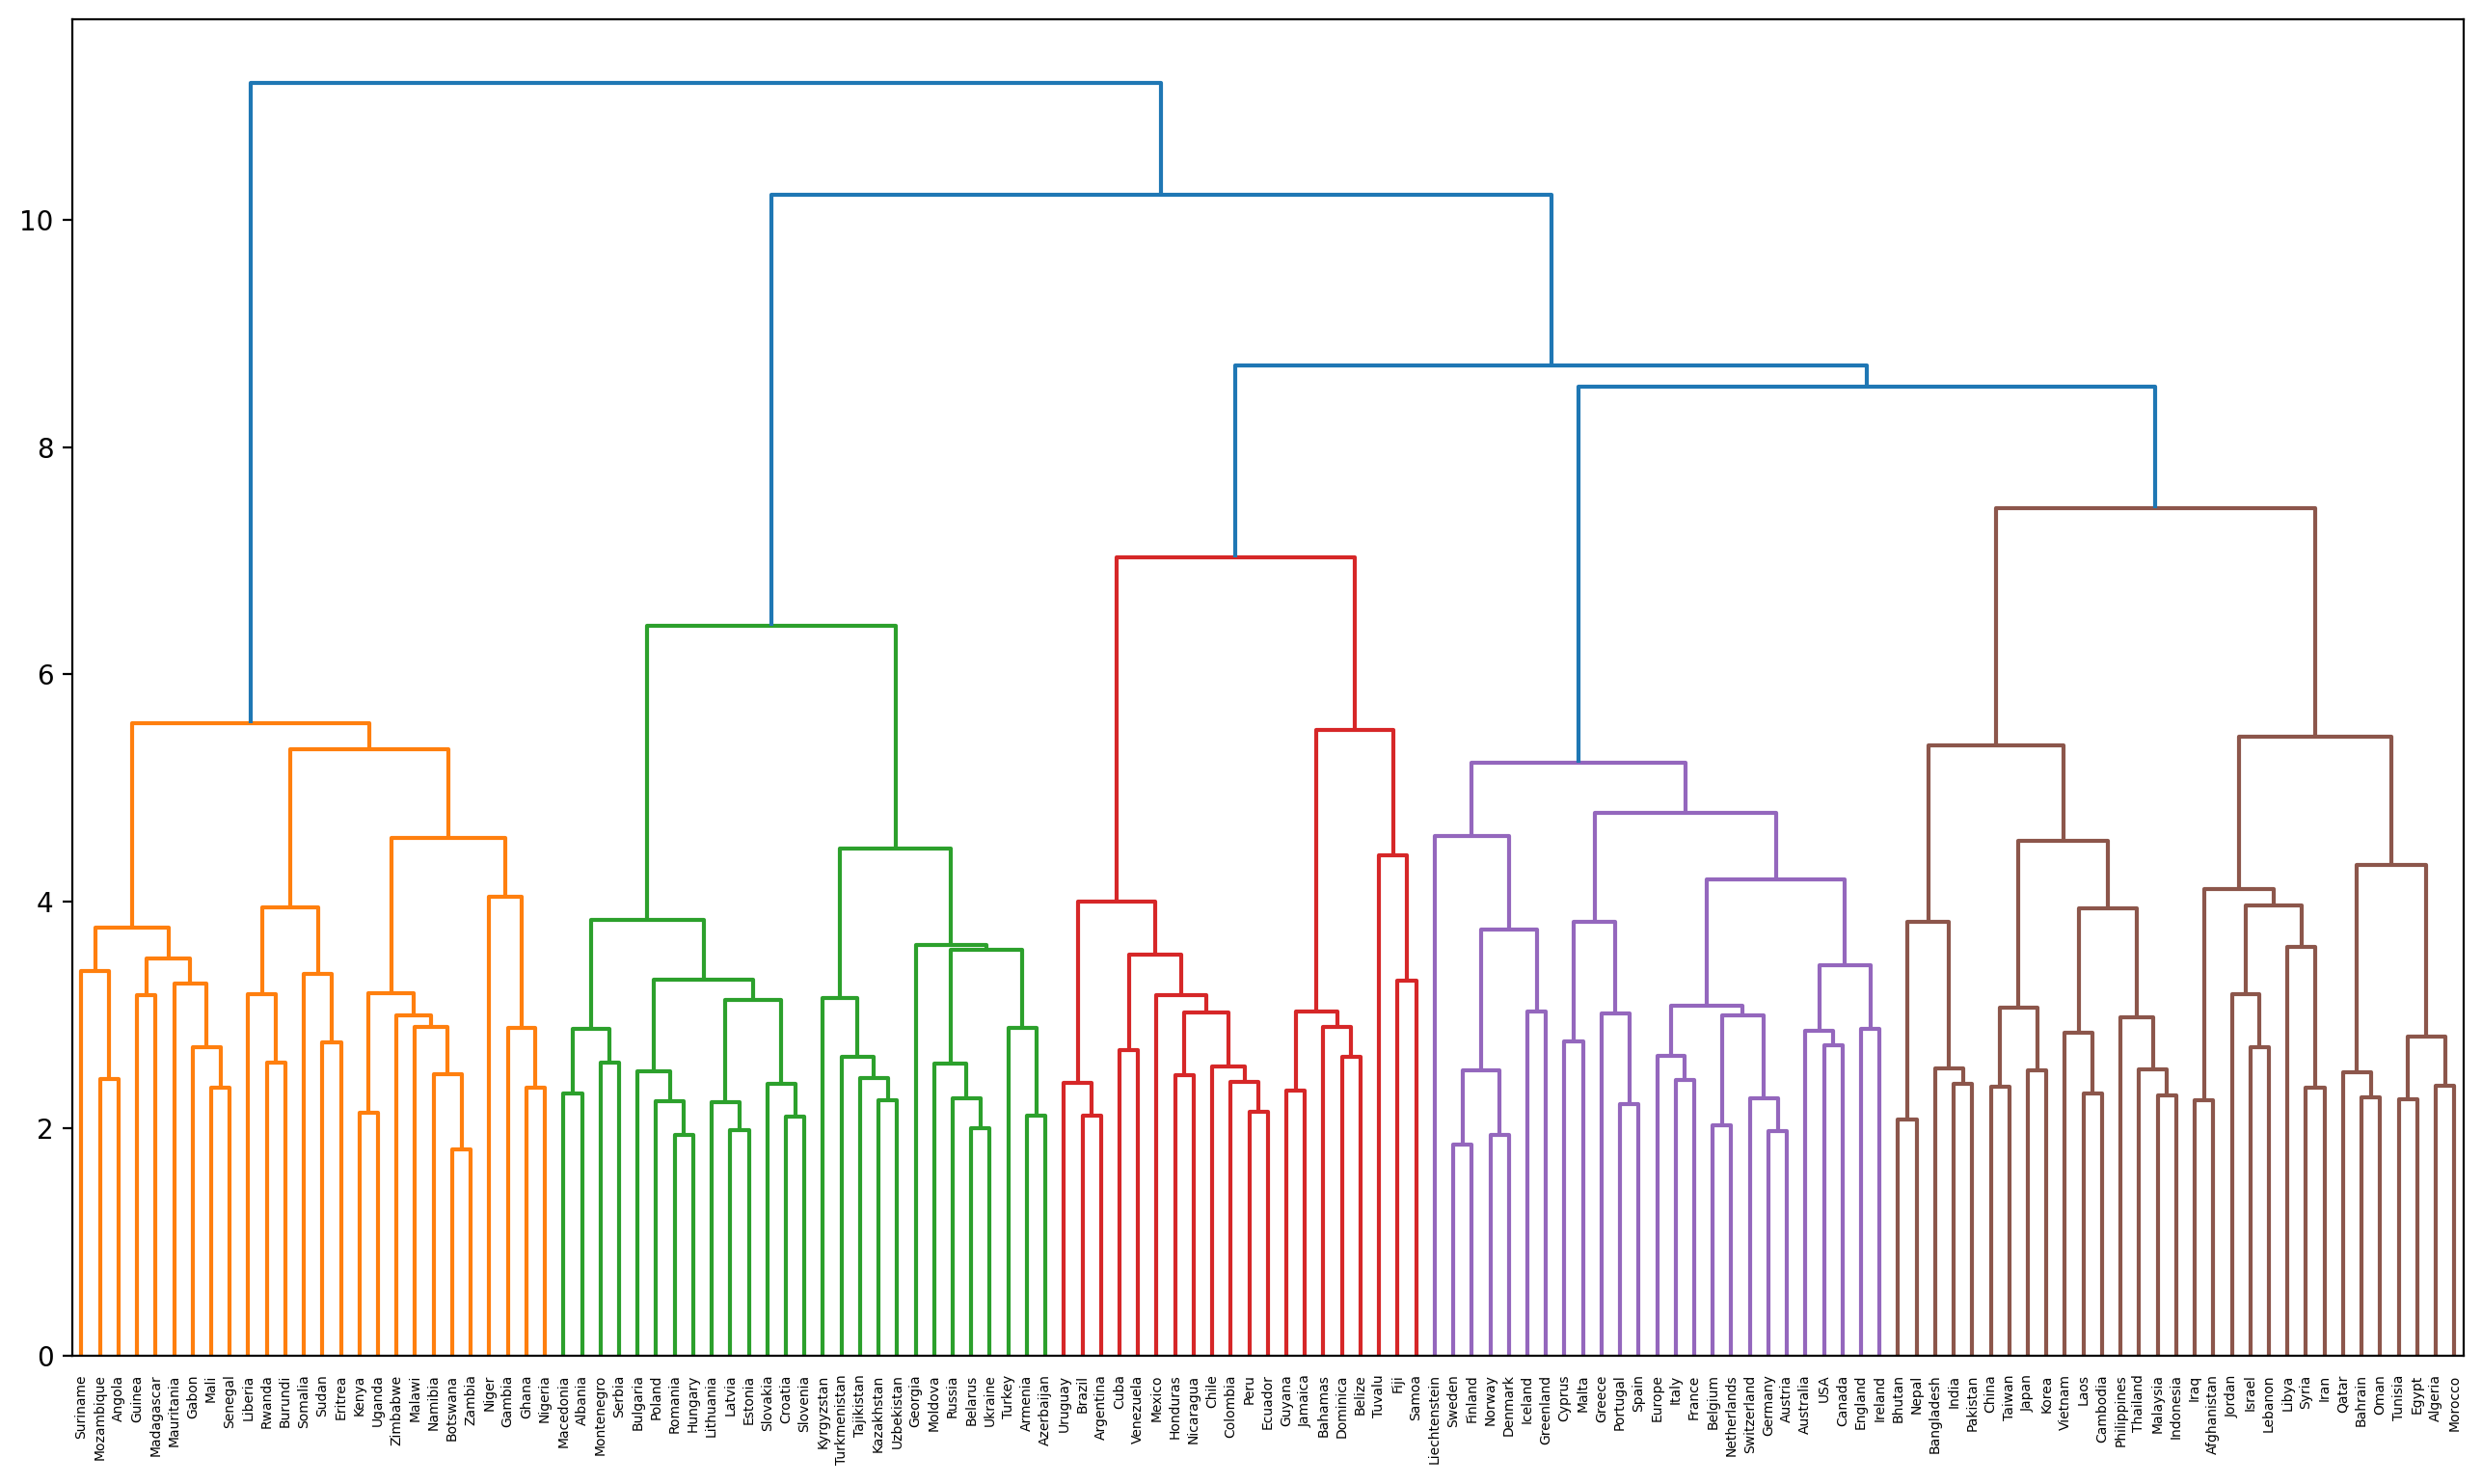

In [ ]:
# Ward法による階層型クラスタリング
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_result = linkage(countries_vec, method="ward", metric="euclidean")
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor="w", edgecolor="k")
dendrogram(linkage_result, labels=countries)
plt.show()

##69. t-SNEによる可視化

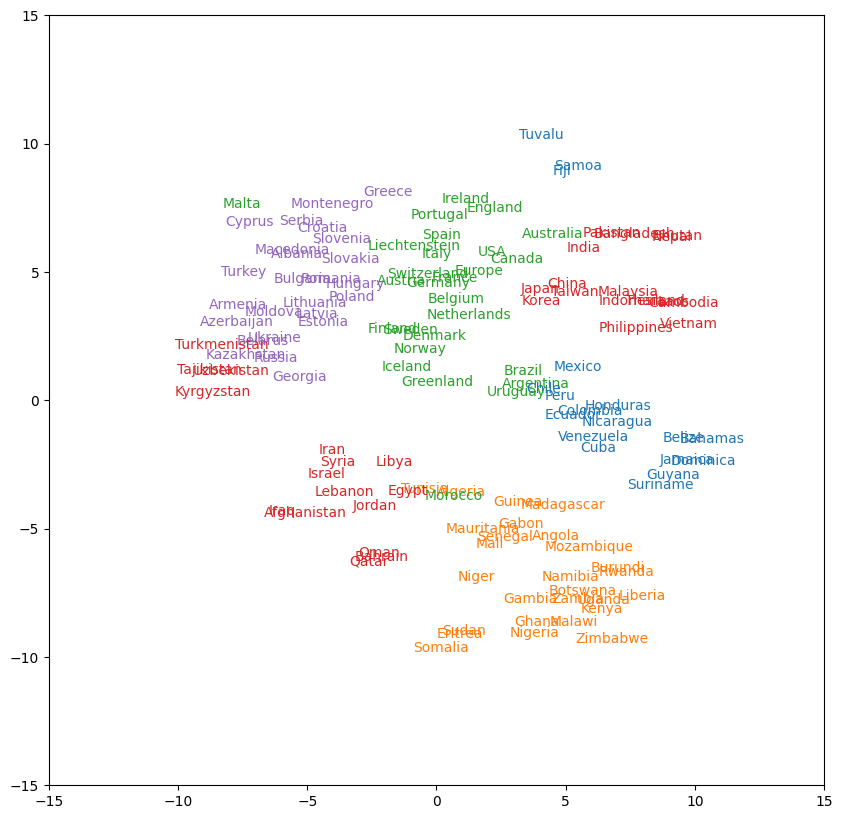

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(np.array(countries_vec))
plt.figure(figsize=(10, 10))
for x, country, color in zip(X_reduced, countries, kmeans.labels_):
    plt.text(x[0], x[1], country, color='C{}'.format(color))
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.show()